<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0015_AluraBB_RedesNeurais_DL_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import make_classification
import torch
from torch import nn # neural network (cria perceptrons)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
SEED = 46
np.random.seed(SEED)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1)
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [30]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k') # esse são meus dados gerados acima
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x-b)/w2
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid()
  plt.xlim(xmin,xmax)
  plt.ylim(ymin, ymax)

def classify(ponto, w1, w2, b):
  ret = w1*ponto[0] + w2*ponto[1] + b
  if ret >= 0:
    return 1, 'yellow'
  else:
     return 0, 'blue'

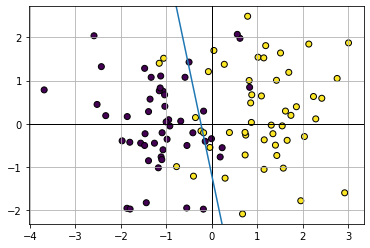

In [31]:
w1 = 5
w2 = 1
b = 1.2
plotmodel(w1, w2, b)
plt.show()

In [32]:
acertos = 0
for k in range(len(X)):
  classe, _ = classify(X[k], w1, w2, b)
  if classe == Y[k]:
    acertos += 1
  
print("Acurácia: {0}%".format(100*acertos/len(X)))

Acurácia: 85.0%


In [33]:
perceptron = nn.Linear(2, 1) # perceptron com duas entradas e uma saída
sigmoide = nn.Sigmoid()
print(perceptron.weight.data) # aquie os pesos foram gerados aleatoriamente
print(perceptron.bias.data) # e o bias também, foi gerado aleatoriamente

# mas eu posso colocar os valores que eu gerei na unha (acima, na aula 0014). Faço assim:

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))
print()
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.0987,  0.5257]])
tensor([-0.4070])

tensor([[5., 1.]])
tensor([1.2000])


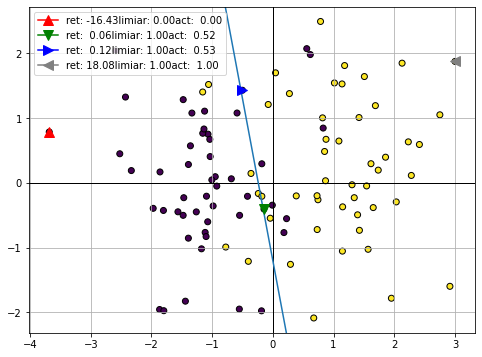

In [34]:
# Função de ativação: sigmóide
activation = nn.Sigmoid()
markers = ['^', 'v', '>', '<']
cores = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8,6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=cores[k], markersize=10, label=label)

plt.legend()
plt.show()

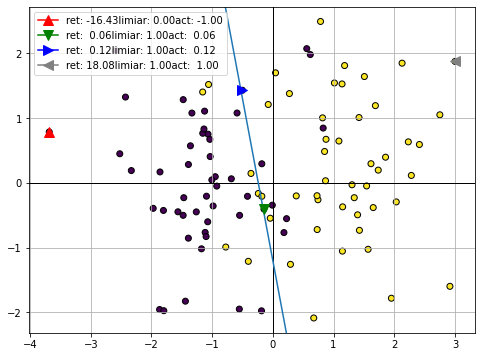

In [35]:
# Função de ativação: tangente hiperbólica
activation = nn.Tanh()
markers = ['^', 'v', '>', '<']
cores = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8,6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=cores[k], markersize=10, label=label)

plt.legend()
plt.show()

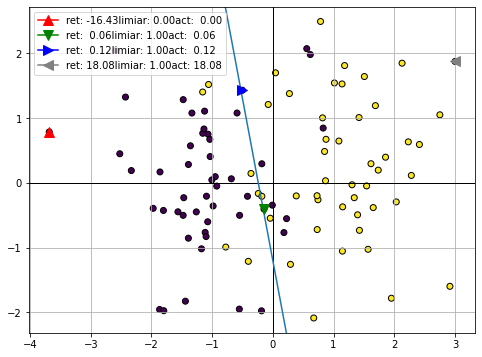

In [36]:
# Função de ativação: relu
activation = nn.ReLU()
markers = ['^', 'v', '>', '<']
cores = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8,6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = activation(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=cores[k], markersize=10, label=label)

plt.legend()
plt.show()